In [2]:
import soccerdata as sd
import pandas as pd
import numpy as np

import seaborn as sns
import scipy.stats
from PIL import Image
import matplotlib as mpl
import matplotlib.patheffects
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.image as mpimg
from mplsoccer import Pitch, add_image
from adjustText import adjust_text
from highlight_text import fig_text
from pywaffle import Waffle

[12/31/22 00:13:25] INFO     No custom team name replacements found. You can configure these in       ]8;id=866686;file:///opt/anaconda3/lib/python3.8/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=436494;file:///opt/anaconda3/lib/python3.8/site-packages/soccerdata/_config.py#85\85]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=46242;file:///opt/anaconda3/lib/python3.8/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=135608;file:///opt/anaconda3/lib/python3.8/site-packages/soccerdata/_config.py#155\155]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [2]:
def clean_df(df,category):
    if category == "misc":
        df.columns = ['League', 'Season', 'Team', 'Player', 'Nation', 'Pos', 
                      'Age', '90s', 'CrdY', 'CrdR','2CrdY', 'Fls', 'Fld', 
                      'Off', 'Crs', 'Int', 'TklW',
                      'PKwon', 'PKcon', 'OG', 'Recov', 
                      'Aerial Duels Won', 'Aerial Duels Lost', 'Aerial Duels Won %']
        df.drop(index=[0,1],inplace=True)
        df = df.replace(np.inf, np.nan)
        df = df.fillna(0)
        
        df[['Age', '90s', 'CrdY', 'CrdR','2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 
                 'Int', 'TklW', 'PKwon','PKcon', 'OG', 'Recov', 'Aerial Duels Won',
                 'Aerial Duels Lost', 'Aerial Duels Won %']] = df[[ 'Age', '90s', 'CrdY', 'CrdR','2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 
                                                                         'Int', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'Aerial Duels Won',
                                                                        'Aerial Duels Lost', 'Aerial Duels Won %']].astype(float)
        
        df["Aerial Duels"] = df["Aerial Duels Won"] + df["Aerial Duels Lost"]
        df = df.drop(index=df[df["Player"]=="Squad Total"].index)
        return df

In [3]:
# fbref = sd.FBref(leagues=["ESP-La Liga"], seasons=['1718', '1819', '1920', '2021', '2122'])
fbref = sd.FBref(leagues=["ESP-La Liga"], seasons="2122")

[12/30/22 23:53:19] INFO     Saving cached data to /root/soccerdata/data/FBref                        ]8;id=481806;file:///opt/anaconda3/lib/python3.8/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=855351;file:///opt/anaconda3/lib/python3.8/site-packages/soccerdata/_common.py#89\89]8;;\

In [9]:
for category in ["misc",'standard','shooting','passing','passing_types','goal_shot_creation',
             'defense','possession','playing_time','misc','keeper','keeper_adv']:
    df = fbref.read_player_season_stats(stat_type=category)
    df.to_csv(f"/work/assets/soccerdata/league/liga/2122/{category}.csv")
# # df_misc = pd.read_csv("/work/assets/fbref/leagueStats/liga/17-23_misc.csv")
# df = clean_df(df_misc,"misc")
# df.to_csv("/work/assets/fbref/leagueStats/liga/17-23_misc.csv")

https://fbref.com/en/squads/8d6fd021/Alaves-Stats
https://fbref.com/en/squads/2b390eca/Athletic-Club-Stats
https://fbref.com/en/squads/db3b9613/Atletico-Madrid-Stats
https://fbref.com/en/squads/206d90db/Barcelona-Stats
https://fbref.com/en/squads/fc536746/Real-Betis-Stats
https://fbref.com/en/squads/f25da7fb/Celta-Vigo-Stats
https://fbref.com/en/squads/ee7c297c/Cadiz-Stats
https://fbref.com/en/squads/6c8b07df/Elche-Stats
https://fbref.com/en/squads/a8661628/Espanyol-Stats
https://fbref.com/en/squads/7848bd64/Getafe-Stats
https://fbref.com/en/squads/a0435291/Granada-Stats
https://fbref.com/en/squads/9800b6a1/Levante-Stats
https://fbref.com/en/squads/2aa12281/Mallorca-Stats
https://fbref.com/en/squads/03c57e2b/Osasuna-Stats
https://fbref.com/en/squads/98e8af82/Rayo-Vallecano-Stats
https://fbref.com/en/squads/53a2f082/Real-Madrid-Stats
https://fbref.com/en/squads/e31d1cd9/Real-Sociedad-Stats
https://fbref.com/en/squads/ad2be733/Sevilla-Stats
https://fbref.com/en/squads/dcc91a7b/Valencia-S

### 観客動員数

In [106]:
df = pd.read_csv("/work/assets/fbref/teamStats/barcelona/fixture2122.csv")
df = df[df["Venue"]=="Home"]
df.dropna(subset="Attendance", inplace=True)
df.head()

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,0,2021-08-15,20:00,La Liga,Matchweek 1,Sun,Home,W,4,2,Real Sociedad,3.1,1.1,62,20384.0,Sergio Busquets,4-3-3,Alejandro Hernández,Match Report,NaN
2,2,2021-08-29,17:00,La Liga,Matchweek 3,Sun,Home,W,2,1,Getafe,1.2,0.4,66,26543.0,Sergio Busquets,4-3-3,Pablo González,Match Report,NaN
3,3,2021-09-14,21:00,Champions Lg,Group stage,Tue,Home,L,0,3,de Bayern Munich,0.2,2.7,49,39737.0,Sergio Busquets,3-1-4-2,Michael Oliver,Match Report,NaN
4,4,2021-09-20,21:00,La Liga,Matchweek 5,Mon,Home,D,1,1,Granada,1.8,0.7,76,27097.0,Sergio Busquets,4-3-3,Santiago Jaime,Match Report,NaN
6,6,2021-09-26,16:15,La Liga,Matchweek 7,Sun,Home,W,3,0,Levante,3.1,0.7,70,35334.0,Sergio Busquets,4-2-3-1,Isidro Díaz de Mera,Match Report,NaN


In [94]:
from mplsoccer import FontManager
spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
monoBFont = FontManager(spaceMono_bold)

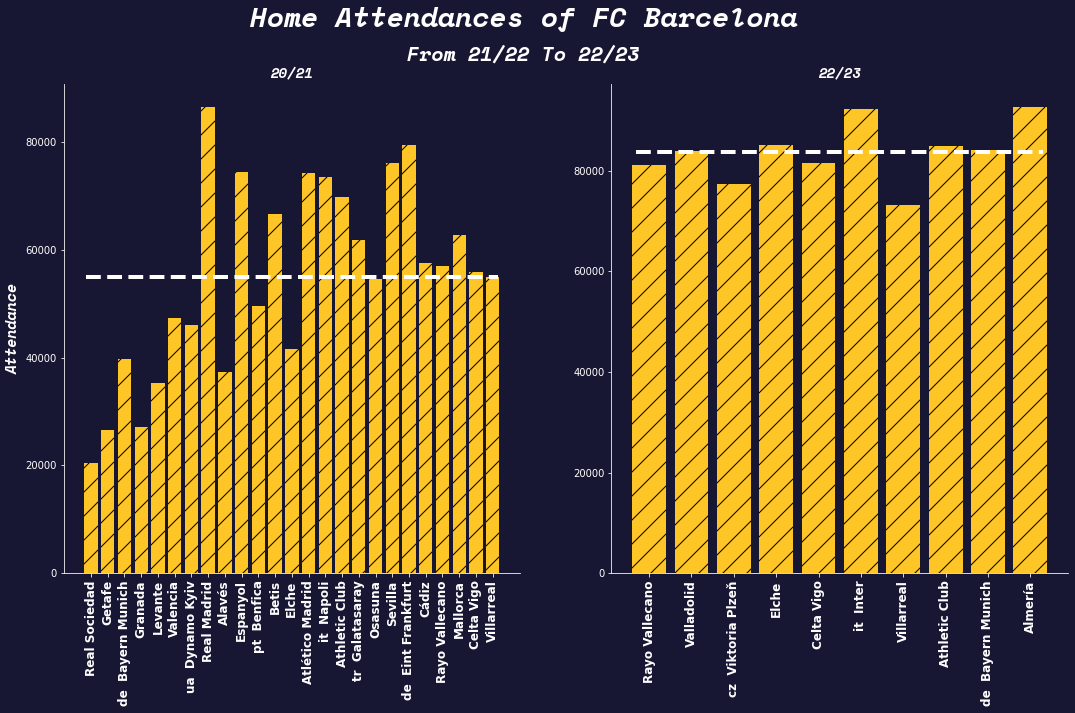

In [163]:
fig_color = "#171733"
fig, axes = plt.subplots(1,2,facecolor=fig_color, figsize=(18,9))

path = [
    "/work/assets/fbref/teamStats/barcelona/fixture2122.csv",
    "/work/assets/fbref/teamStats/barcelona/fixture2223.csv"
]

y = "Attendance"
for idx in range(len(axes)):
    df = pd.read_csv(path[idx])
    df = df[df["Venue"]=="Home"]
    df.dropna(subset="Attendance", inplace=True)

    df["x"] = np.arange(0,len(df[y]))
    df['y'] = df[y]
    
    axes[idx].set_facecolor(fig_color)
    axes[idx].spines['right'].set_visible(False)
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['left'].set_color("#fefefe")
    axes[idx].spines['bottom'].set_color("#fefefe")
    axes[idx].tick_params(axis="both", colors="#fefefe")
    axes[idx].set_xlabel("",fontsize=15,fontweight='bold',color="#fdc526",fontproperties=monoBFont.prop)
    axes[0].set_ylabel("Attendance",fontsize=15,fontweight='bold',color="#ffffff",fontproperties=monoBFont.prop)
    axes[idx].set_xticks(
        df["x"],
        df["Opponent"],
        color = 'white',
        rotation = 90,
        size = 12,
        weight = 'bold')
    
    axes[idx].bar(df["x"], height=df["y"], color='#fdc526', hatch="/")

    axes[idx].plot([-0.3,df["x"].max()+0.3],[df[y].mean(),df[y].mean()],color="white",linestyle="--",linewidth=4)
      
title = "Home Attendances of FC Barcelona"
legend = "<From 21/22 To 22/23>"
fig_text(x=0.48, y=0.96, s=title, color="#ffffff", fontproperties=monoBFont.prop,
         fontsize=28, ha='center', highlight_colors=["#ffffff"], highlight_weights=['bold'])
fig_text(x=0.48, y=0.91, s=legend, color="#ffffff", fontproperties=monoBFont.prop,
         fontsize=20, ha='center', highlight_colors=["#ffffff"], highlight_weights=['normal'])

axes[0].set_title("20/21",color="#ffffff", fontproperties=monoBFont.prop,fontsize=14)
axes[1].set_title("22/23",color="#ffffff", fontproperties=monoBFont.prop,fontsize=14)

# clubMark = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/LaLiga_logo_%28stacked%29.svg/1200px-LaLiga_logo_%28stacked%29.svg.png"
# mark = Image.open(urllib.request.urlopen(clubMark))
# ax_image = add_image(
#     mark, fig, left=axes[0].get_position().x0+0.05, bottom=axes[0].get_position().y1+0.07, width=0.1, height=0.1, alpha=.9)  
# counter = 0
# for k, ax in ax_dict.items():
#     if k == 'A':
#         continue
#     DC_to_FC = ax.transData.transform
#     FC_to_NFC = fig.transFigure.inverted().transform
#     # -- Take data coordinates and transform them to normalized figure coordinates
#     DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
#     ax_coords = DC_to_NFC((.65,.71))
#     ax_size = 0.023
#     image_ax = fig.add_axes(
#         [ax_coords[0], ax_coords[1], ax_size, ax_size],
#         fc='None'
#     )
#     fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
#     club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_logos[counter]:.0f}_xsmall.png'))
#     image_ax.imshow(club_icon)
#     image_ax.axis('off')
#     counter += 1
# plt.savefig(f'/work/output/attendance2223.png', bbox_inches='tight', transparent=True, dpi=200, facecolor=fig_color)

In [ ]:
df = pd.read_csv("/work/assets/fbref/leagueStats/liga/17-23_misc.csv")
df = df[(df["Aerial Duels"] > 38)&(df["Pos"]=="DF")&(df["Season"]==2122)]
df.shape

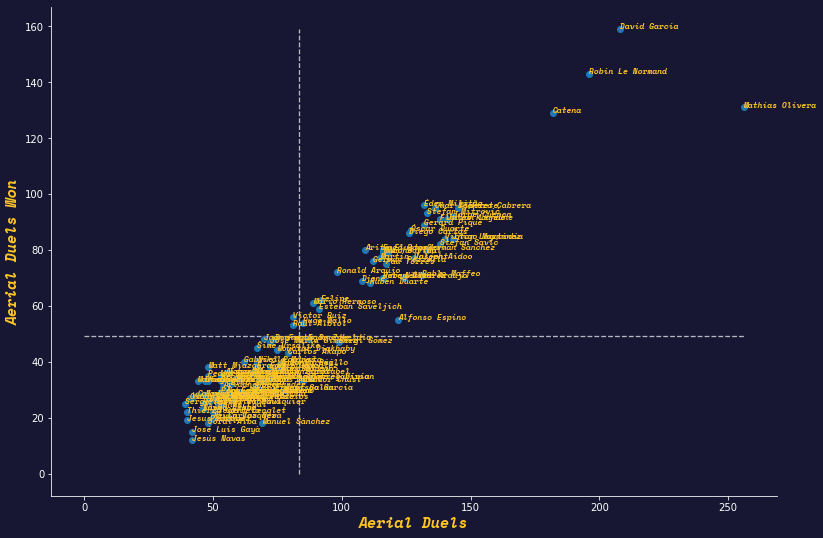

In [245]:
fig, axes = plt.subplots(facecolor=fig_color, figsize=(13,9))
axes.set_facecolor(fig_color)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.spines['left'].set_color("#fefefe")
axes.spines['bottom'].set_color("#fefefe")
axes.tick_params(axis="both", colors="#fefefe")
axes.set_xlabel("Aerial Duels",fontsize=15,fontweight='bold',color="#fdc526",fontproperties=monoBFont.prop)
axes.set_ylabel("Aerial Duels Won",fontsize=15,fontweight='bold',color="#fdc526",fontproperties=monoBFont.prop)


df['x'] = df['']
df['y'] = df['Aerial Duels']

max_x = df['x'].max()
max_x = round(max_x)
max_y = df['y'].max()
max_y = round(max_y)

median_x = df['x'].mean()
median_y = df['y'].mean()

text_values = df[['x','y','Player']].values 
texts = [
    axes.text(val[0],val[1],val[2],
              size=8, color=text_color, zorder=5,
              fontproperties=monoBFont.prop) for val in text_values
]

axes.plot(
    [median_x,median_x], [0,max_y],
    color='#fefefe', ls="--", lw=1.3, alpha=0.7, zorder=1)
axes.plot(
    [0,max_x],[median_y, median_y],
    color='#fefefe', ls="--", lw=1.3, alpha=0.7, zorder=1)
axes.scatter(x=df["x"], y=df["y"])

In [12]:
import seaborn as sns
import scipy.stats
from PIL import Image
import matplotlib as mpl
import matplotlib.patheffects
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.image as mpimg
from mplsoccer import Pitch, add_image
from adjustText import adjust_text
from highlight_text import fig_text
from pywaffle import Waffle

In [13]:
spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'

from mplsoccer import FontManager
from matplotlib.colors import LinearSegmentedColormap

monoBFont = FontManager(spaceMono_bold)

In [8]:
fig_color = "#171733"
text_color= "#fdc526"

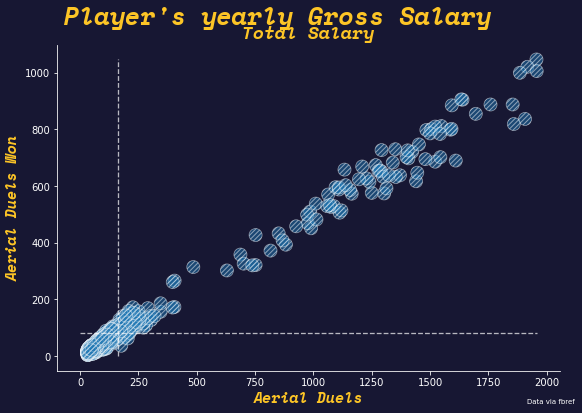

In [21]:
# sns.set(style="darkgrid")
df['x'] = df['Aerial Duels']
df['y'] = df['Aerial Duels Won']

fig, axes = plt.subplots(facecolor=fig_color, figsize=(9,6))
axes.set_facecolor(fig_color)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.spines['left'].set_color("#fefefe")
axes.spines['bottom'].set_color("#fefefe")

fig.text(x=.85,y=.05,s='Data via fbref',color='#fefefe', fontsize=7)

fig_text(s=f"<Player's yearly Gross Salary>",
         x=axes.get_position().x0+.01,y=axes.get_position().y1+0.035,
         color="#ffffff",
         highlight_colors=["#fdc526"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=25,
         fontproperties=monoBFont.prop,fig=fig)

sns.scatterplot(x="x", y="y", data=df, hatch=5*"/", palette=sns.color_palette("spring_r"), s=170, alpha=.5, ax=axes)
axes.set_facecolor(fig_color)
axes.set_xlabel("Aerial Duels",fontsize=15,fontweight='bold',color="#fdc526",fontproperties=monoBFont.prop)
axes.set_ylabel("Aerial Duels Won",fontsize=15,fontweight='bold',color="#fdc526",fontproperties=monoBFont.prop)
axes.set_title("Total Salary", fontweight='bold', fontsize=18, color="#fdc526",fontproperties=monoBFont.prop)
axes.tick_params(axis='both', colors="#fefefe")

# axes.scatter(df['x'],df['y'], s=170 ,hatch=5*'/', alpha=.2)
# for idx,row in df.iterrows():
#     if row['Player'] == 'Alexis Mac Allister':
#         ax.scatter(row['x'],row['y'],s=258,c='#4361ee',marker='o',hatch=5*'/',zorder=5)
#     elif row['Player'] == 'Adam Lallana':
#         ax.scatter(row['x'],row['y'],s=258,c='#f72585',marker='o',hatch=5*'/',zorder=5)
#     elif row['Player'] == 'Leandro Trossard':
#         ax.scatter(row['x'],row['y'],s=258,c='#e36414',marker='o',hatch=5*'/',zorder=5)
#     elif row['Player'] == 'Pascal Groß':
#         ax.scatter(row['x'],row['y'],s=258,c='#6411ad',marker='o',hatch=5*'/',zorder=5)
        
#     ax.scatter(row['x'],row['y'], s=170 ,hatch=5*'/', alpha=.2)
    
# text_values = df[['x','y','Player']].values 
# texts = [
#     axes.text(val[0],val[1],val[2],
#               size=8, color=text_color, zorder=5,
#               fontproperties=monoBFont.prop) for val in text_values
# ]
# [text.set_path_effects([mpl.patheffects.withStroke(
#     linewidth=3, foreground='#131313'
# )]) for text in texts]

# adjust_text(
#     texts, autoalign='y',
#     only_move={'points':'y', 'text':'xy'}, 
#     force_objects=(0.5, 3), force_text=(0.5, 3), 
#     force_points=(0.5, 7)
# )

max_x = df['x'].max()
max_x = round(max_x)
max_y = df['y'].max()
max_y = round(max_y)

median_x = df['x'].mean()
median_y = df['y'].mean()

axes.plot(
    [median_x,median_x],[0,max_y],
    color='#fefefe', ls="--", lw=1.3, alpha=0.7, zorder=1)
axes.plot(
    [0,max_x],[median_y,median_y],
    color='#fefefe', ls="--", lw=1.3, alpha=0.7, zorder=1)

# plt.savefig(f'/work/output/report/mac_scatter.png', bbox_inches='tight', transparent=True, dpi=500, facecolor='#F8F8FF')

In [120]:
fbref = sd.FBref(leagues=["GER-Bundesliga"], seasons=["21-22"])

[08/06/22 01:24:01] INFO     Saving cached data to /root/soccerdata/data/FBref                        ]8;id=397982;file:///opt/anaconda3/lib/python3.8/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=787345;file:///opt/anaconda3/lib/python3.8/site-packages/soccerdata/_common.py#89\89]8;;\

In [62]:
from pathlib import Path
import os
BASE_DIR = Path(os.environ.get("SOCCERDATA_DIR", Path.home() / "soccerdata"))
LOGS_DIR = Path(BASE_DIR, "logs")
DATA_DIR = Path(BASE_DIR, "data")
CONFIG_DIR = Path(BASE_DIR, "config")

In [63]:
seasons = fbref.read_seasons()
print(seasons)
FBREF_DATADIR = DATA_DIR / "FBref"
FBREF_API = "https://fbref.com"
# collect teams
teams = []
for (lkey, skey), season in seasons.iterrows():
    # read html page (league overview)
    filemask = "seasons_{}.html"
    filepath = fbref.data_dir / filemask.format(lkey, skey)
    print(filepath)
    url = FBREF_API + season.url
    print(url)
    reader = fbref.get(url, filepath)
    print(reader)
    

                       #_squads       champion               top_scorer  \
league         season                                                     
GER-Bundesliga 2122          18  Bayern Munich  Robert Lewandowski - 35   

                                                 url  
league         season                                 
GER-Bundesliga 2122    /en/comps/20/Bundesliga-Stats  
/root/soccerdata/data/FBref/seasons_GER-Bundesliga.html
https://fbref.com/en/comps/20/Bundesliga-Stats
<_io.BufferedReader name='/root/soccerdata/data/FBref/seasons_GER-Bundesliga.html'>


In [97]:
# Had to do this manually :(
team_logos = [
    8524, 9857, 7801, 8534,
    8535, 8636, 9885, 8543,
    9888, 8564, 6504, 9875,
    8686, 6480, 9882, 7943,
    9881, 9804, 8600, 9876
]

def plot_zone_dominance(ax, team_id):
    filtered_df = data[data['team_id'] == team_id].copy()
    pitch = Pitch(
        pitch_type='uefa',
        goal_type='box',
        linewidth=1.1,
        line_color='black',
        pad_top=10,
        corner_arcs=True
    )
    pitch.draw(ax = ax)

    # Here we can get the positional dimensions
    pos_x = pitch.dim.positional_x
    pos_y = pitch.dim.positional_y

    # We test the dimensions with the labels we got from the Analyst
    counter = 1
    filtered_df['zone'] = filtered_df['zone'].astype(int)
    for index_y, y in enumerate(pos_y):
        for index_x, x in enumerate(pos_x):
            try:
                label_y = (pos_y[index_y] + pos_y[index_y + 1])/2
                label_x = (pos_x[index_x] + pos_x[index_x + 1])/2
                lower_y = pos_y[index_y]
                lower_x = pos_x[index_x]
                upper_y = pos_y[index_y + 1]
                upper_x = pos_x[index_x + 1]
            except:
                continue
            data_point = filtered_df[filtered_df['zone'] == counter]['perc_for'].iloc[0]
            if data_point > .55:
                color = '#3E5641'
            elif data_point < .45:
                color = '#461220'
            else:
                color = '#FCB9B2'
            ax.fill_between(
                x=[lower_x, upper_x],
                y1=lower_y,
                y2=upper_y,
                color=color,
                zorder=0,
                alpha=0.75,
                ec='None'
            )
            counter += 1
    ax.annotate(
        xy=(pos_x[0]*1.15, pos_y[-1]*1.1),
        text=f"{filtered_df['team'].iloc[0].upper()}",
        size=9,
        color='black',
        ha='left',
        va='center',
        weight='bold',
    )

    for x in pos_x[1:-1]:
        ax.plot([x,x], [pos_y[0], pos_y[-1]], color='#000000', ls='dashed', zorder=0, lw=0.3)
    for y in pos_y[1:-1]:
        ax.plot([pos_x[0], pos_x[-1]], [y,y], color='#000000', ls='dashed', zorder=0, lw=0.3)
    
    return ax

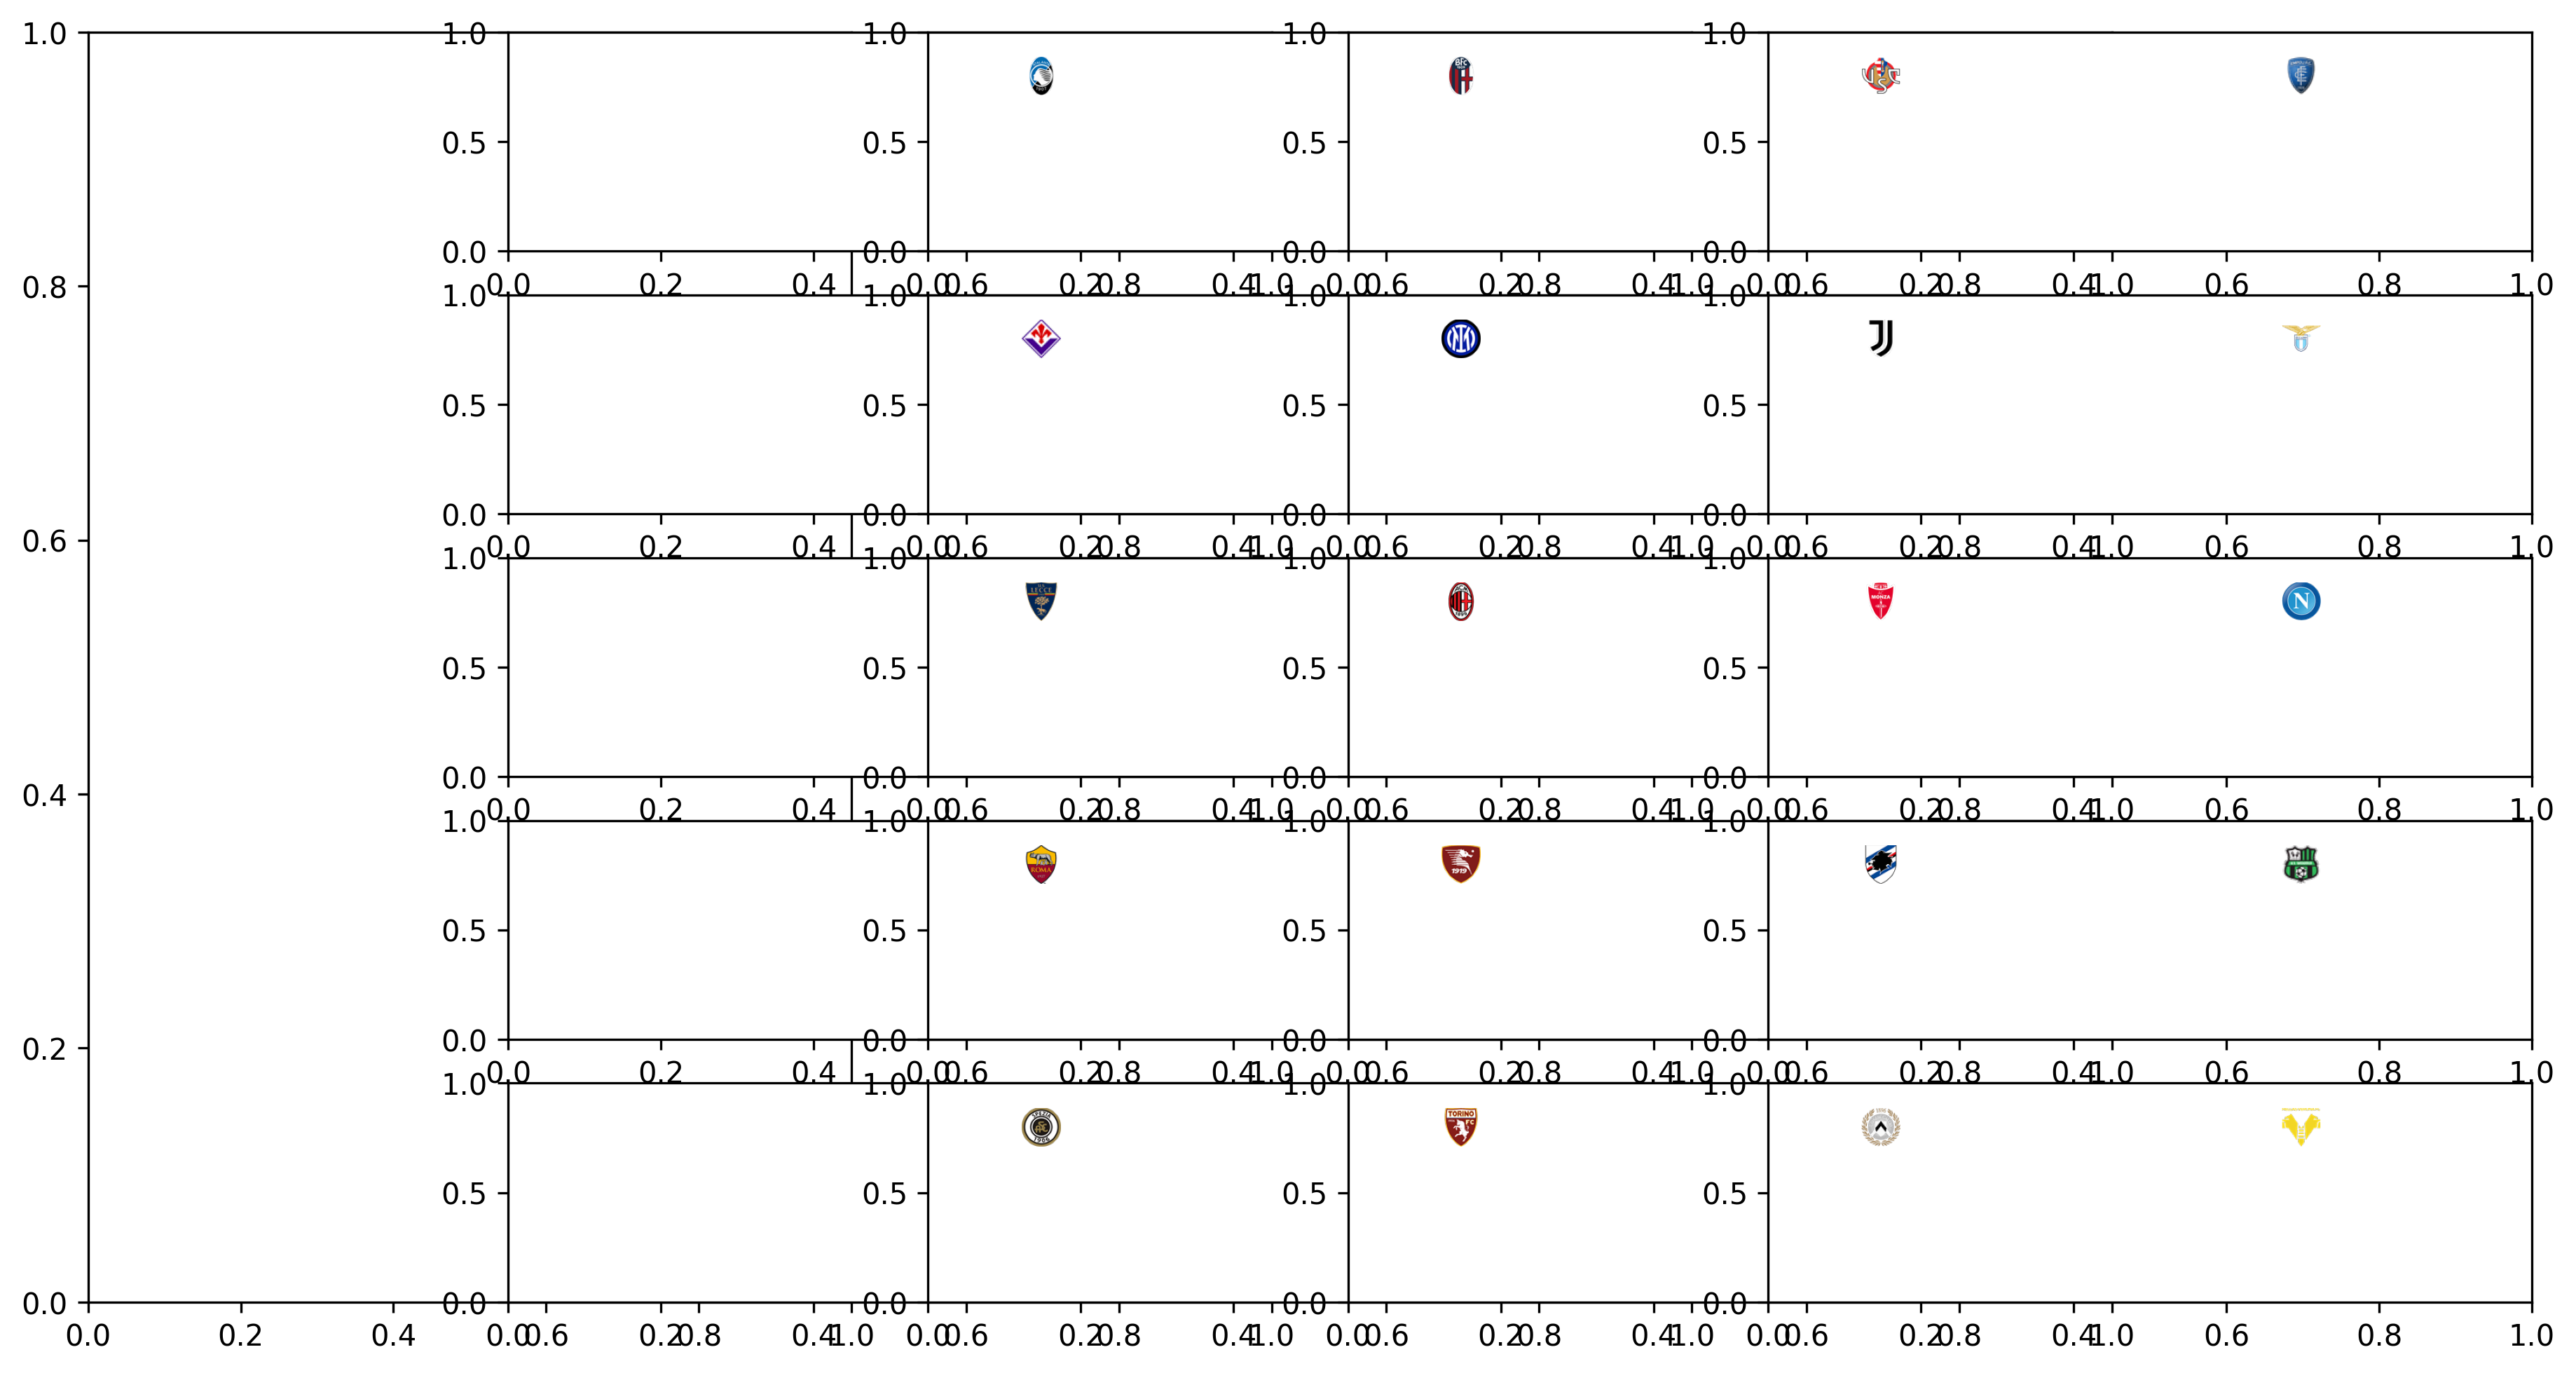

In [104]:
layout = '''
    ABCDE
    AFGHI
    AJKLM
    ANOPQ
    ARSTU
'''
import urllib
fig = plt.figure(figsize=(15,8), dpi=300)
ax_dict = fig.subplot_mosaic(layout, gridspec_kw={'wspace':-0.45})

# We add the logos once we've reshaped the figure
counter = 0
for k, ax in ax_dict.items():
    if k == 'A':
        continue
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # -- Take data coordinates and transform them to normalized figure coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((.65,.71))
    ax_size = 0.023
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_logos[counter]:.0f}_xsmall.png'))
    image_ax.imshow(club_icon)
    image_ax.axis('off')
    counter += 1
